In [2]:
import yfinance as yf 
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib as plt
import matplotlib_inline 
import seaborn as sns
import pickle

In [3]:
wiki_sp_url = "https://en.wikipedia.org/wiki/List_of_S&P_500_companies"

In [4]:
sp500_comonents = pd.read_html(wiki_sp_url)

In [5]:
sp_df = sp500_comonents[0]

In [6]:
sp_ticker_list = np.array(sp_df['Symbol'].values)
sp_secotr_list = np.array(sp_df['GICS Sector'].values)
unique_sectors = np.array(set(sp_secotr_list))

In [7]:
list_of_sectors_tickers = pd.DataFrame({
    "Sector": sp_secotr_list,
    "Ticker": sp_ticker_list
    })

In [75]:
users_sector = str(input(f"""
                     Dear user please provide name of sector form list below, that you are interested in: 
                     {unique_sectors}

                     """))

users_start_date = input("Please provide starting date for data in fomrat YYYY-MM-DD: ") 
users_end_date = input("Please provide ending date for data in fomrat YYYY-MM-DD: ")

In [76]:
filtered_tickers = list_of_sectors_tickers[list_of_sectors_tickers['Sector'] == users_sector]

In [77]:
all_tickers_stock_data = {}
for ticker in filtered_tickers['Ticker']:
    stock_data_for_user_inputs =yf.download(ticker,users_start_date, users_end_date)
    all_tickers_stock_data[ticker] = pd.DataFrame(stock_data_for_user_inputs['Adj Close']).T

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [78]:
all_tickers_stock_data_df = pd.concat(
    [df.assign(Ticker=ticker) for ticker, df in all_tickers_stock_data.items()]
).T.drop('Ticker')


In [79]:
daily_reutrns_for_sectors = ((all_tickers_stock_data_df - all_tickers_stock_data_df.shift(1))/ all_tickers_stock_data_df.shift(1)).dropna()


In [80]:
commodities = [
    "GC=F",  # Złoto
    "SI=F",  # Srebro
    "CL=F",  # Ropa naftowa (WTI)
    "BZ=F",  # Ropa naftowa (Brent)
    "NG=F",  # Gaz ziemny
    "HG=F",  # Miedź
    "ZW=F",  # Pszenica
    "ZC=F",  # Kukurydza
    "ZS=F",  # Soja
    "CT=F",  # Bawełna
    "SB=F",  # Cukier
    "KC=F",  # Kawa
]

In [81]:
commodities_data = yf.download(commodities, users_start_date, users_end_date)['Adj Close']

[*********************100%***********************]  12 of 12 completed


In [82]:
daily_reutrns_for_commodities = ((commodities_data - commodities_data.shift(1))/ commodities_data.shift(1)).dropna()


In [83]:
us_tresuries =[

    "^IRX",  # 13-week Treasury Bill
    "^FVX",  # 5-Year Treasury Yield
    "^TNX",  # 10-Year Treasury Yield
    "^TYX",  # 30-Year Treasury Yield
]


In [84]:
us_tresuries_data = yf.download(us_tresuries, users_start_date, users_end_date)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [85]:
daily_reutrns_for_us_tresuries = ((us_tresuries_data - us_tresuries_data.shift(1))/ us_tresuries_data.shift(1)).dropna()

In [86]:
data_combined = daily_reutrns_for_sectors.join(daily_reutrns_for_us_tresuries).join(daily_reutrns_for_commodities)

In [87]:
corr_matrix= data_combined.corr()


<Axes: xlabel='Ticker', ylabel='Ticker'>

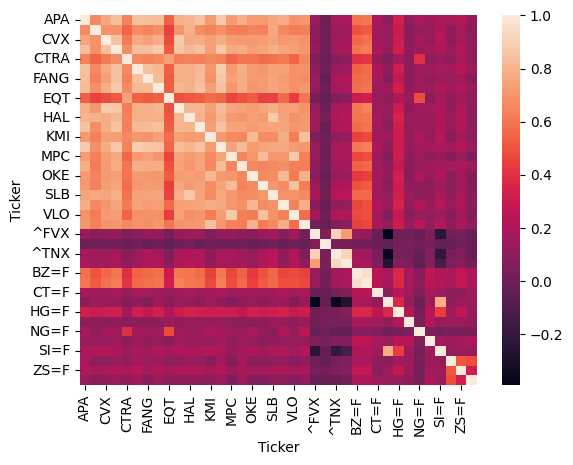

In [88]:
sns.heatmap(corr_matrix)

In [91]:
treshold = float(input("Dear user, please choose a threshold from which data should be shown (e.g., 0.8): )"))


corr_matrix[(corr_matrix.abs() >= treshold) & (corr_matrix != 1)].fillna("0").head(len(corr_matrix))

Ticker,APA,BKR,CVX,COP,CTRA,DVN,FANG,EOG,EQT,XOM,...,CT=F,GC=F,HG=F,KC=F,NG=F,SB=F,SI=F,ZC=F,ZS=F,ZW=F
Ticker,,,,,,,,,,,,,,,,,,,,,
APA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BKR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CTRA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DVN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FANG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EOG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EQT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
